In 2019, attention to serious crimes has been brought to the eyes of the public. Through September 1 this year alone, there have been a recorded 283 mass shootings (*Gun Violence Archive*) in 2019. The number of mass shootings has surpassed the number of days that have passed in the year. When we go out to events or visit public places, we want to feel safe and know that our friends and family will not be at harm. Current events have sparked an interest in me to deeply explore crime patterns in San Francisco, which is a major city that I have lived near my entire life. San Francisco has a population of ~880,000 with a size of 46.87 mi<sup>2</sup>. With such a dense area and wide variety of people, San Francisco is prone to crime. Answering questions such as *What time of the year are crimes most likely to happen?* and *Are certain areas of San Francisco more prone to crime?* can help visitors and inhabitants stay safe. I will be observing crime reports from San Francisco's Opendata platform (*https://datasf.org/opendata/*), dating from 2003 to 2019. I have cleaned and consolidated the data for comprehensibility, and I will be addressing vital questions for understanding crime patterns in San Francisco throughout the years. 

In [2]:
# Import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Grab dataframe containing police reports
# Create df on Macbook
# df = pd.read_csv("/Users/garrettyamane/Desktop/Springboard/capstone_project_1_data/merged.csv")

# Create df on PC
df = pd.read_csv("/Users/Garrett/Desktop/Springboard/capstone_project_1_data/merged.csv")
df = df.drop(columns='Unnamed: 0')
df.head()

,Incident Number,Incident Category,Incident Description,Incident Day of Week,Incident Date,Incident Time,Police District,Resolution,Intersection,Longitude,Latitude,point,Row ID,Incident Year,Analysis Neighborhood
0,100087859,"SEX OFFENSES, FORCIBLE",ANNOY OR MOLEST CHILDREN,Wednesday,2003-01-01,00:01,SOUTHERN,COMPLAINANT REFUSES TO PROSECUTE,800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",10008785914010,2003,South of Market
1,91139945,"SEX OFFENSES, FORCIBLE",SEXUAL BATTERY,Wednesday,2003-01-01,00:01,BAYVIEW,DISTRICT ATTORNEY REFUSES TO PROSECUTE,200 Block of BRIDGEVIEW DR,-122.397590,37.734209,"(37.7342093398821, -122.397590096788)",9113994504144,2003,Bayview Hunters Point
2,81360718,EMBEZZLEMENT,"EMBEZZLEMENT, GRAND THEFT BY EMPLOYEE",Wednesday,2003-01-01,00:01,RICHMOND,NONE,2900 Block of PACIFIC AV,-122.443835,37.792137,"(37.7921365604231, -122.443835267233)",8136071810045,2003,Pacific Heights
3,81313927,SUSPICIOUS OCC,SUSPICIOUS OCCURRENCE,Wednesday,2003-01-01,00:01,MISSION,NONE,500 Block of GUERRERO ST,-122.424037,37.762751,"(37.7627513875316, -122.424036887526)",8131392764070,2003,Mission
4,81183231,FORGERY/COUNTERFEITING,"FORGERY, DRIVERS LICENSE OR ID-CARD",Wednesday,2003-01-01,00:01,NORTHERN,NONE,3000 Block of FILLMORE ST,-122.435517,37.797573,"(37.7975726990109, -122.435517480769)",8118323109120,2003,Marina


## How has crime report rate changed since 2003?

In [37]:
# Get Series of Year and the number of crime reports for that year
num_reports_by_year = df['Incident Year'].value_counts().sort_index()

# Drop 2019 from num_reports_by_year since 2019 is not fully updated
num_reports_by_year = num_reports_by_year[0:16]

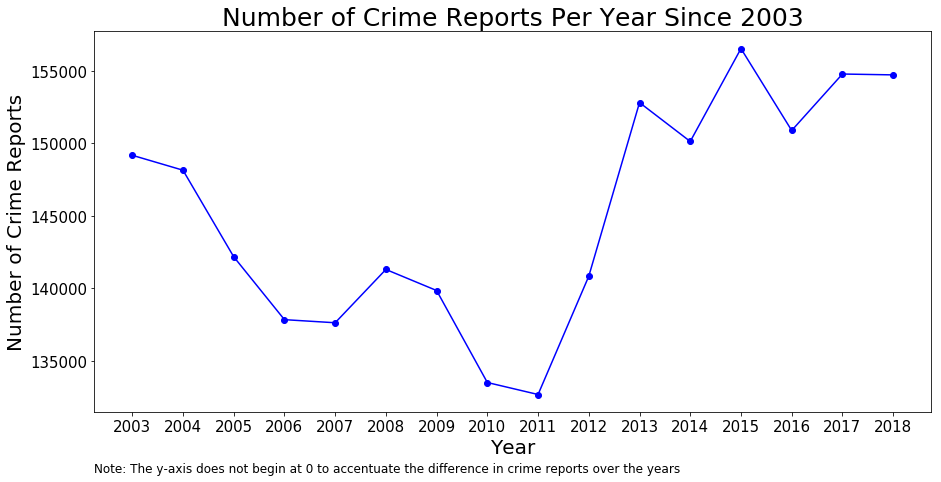

In [41]:
# Create figure for number of crime reports and plot
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(num_reports_by_year.index, num_reports_by_year.values, 'o-b')

# Set title and axis labels
ax.set_title("Number of Crime Reports Per Year Since 2003", fontsize=25)
ax.set_xlabel("Year", fontsize=20)
ax.set_ylabel("Number of Crime Reports", fontsize=20)
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)

# Show all years on x-axis
plt.xticks(num_reports_by_year.index)

# Add footnote
plt.annotate('Note: The y-axis does not begin at 0 to accentuate the difference in crime reports over the years', (0,0), (0, -50), xycoords='axes fraction', textcoords='offset points', va='top', fontsize=12)

plt.show()

In [47]:
print("Average Number of Reports Per Year:", num_reports_by_year.mean())
print("Minimum Number of Reports:", min(num_reports_by_year))
print("Maximum Number of Reports:", max(num_reports_by_year))

Average Number of Reports Per Year: 145191.875
Minimum Number of Reports: 132697
Maximum Number of Reports: 156526


I first want to emphasize that I did not choose to include crime reports from 2019 in this chart due to the calendar year not being fully over. I didn't want the chart to have a major dip for 2019 and create a bias in crime rate because of this, so I chose to omit the point.

Moving on, I think that there are a couple of interesting things to takeaway from the chart. Beginning in 2003, the number of yearly crime reports was already high relative to average number of crime reports per year. However, there was a steady decline until it reached the lowest point in 2011. Since then, the number of reports per year has been increasing and I believe this is a good motivator to look deeper into why this may be. What patterns since 2011 can we observe in crime reports that may be a cause of the increase? And how can we use this to prevent/prepare for future crime in San Francisco? These types of questions drive the exploration of this data and are key to improving the safety of visitor and inhabitants in San Francisco.